**TASK-2**

**PREDICTION USING UNSUPERVISED ML**


In [2]:
# importing lib 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

**IMPORTING IRIS DATASHEET**

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("dataset imported successfully")

dataset imported successfully


**DATA ANALYSIS**

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df.shape


(150, 4)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**PREPARING DATA FOR MODEL**

In [8]:
x = df.iloc[:,[0,1,2,3]].values

**PLOTTING THE ELBOW CURVE**

In [9]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init= 'k-means++',
                  max_iter = 100,n_init = 10,random_state= 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

**APPLYING Kmeans TO THE DATASET**

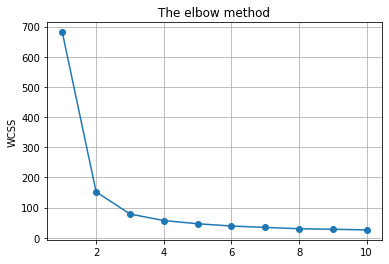

In [10]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.ylabel('WCSS')# within cluster sum of pair
plt.grid()
plt.show()

**VISUALIZING THE CLSUTER**

In [11]:
#applying  kmeans to the datasets/ creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter=300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

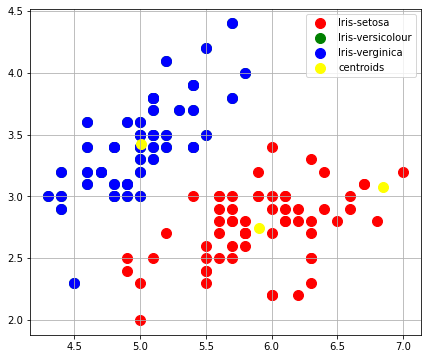

In [15]:
plt.figure(figsize=(7,6))
#visualisinng the cluster on the first two coloums
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s = 100, c = 'red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
            s = 100, c = 'green',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
            s = 100, c = 'blue',label = 'Iris-verginica')

#plotting the centriod of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'centroids')
plt.legend()
plt.grid()
plt.show()